In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd
from sklearn.metrics import roc_auc_score, log_loss
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

2024-05-18 18:48:31.613484: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-18 18:48:32.678360: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
train_path = "Data files/AppML_InitialProject_train.h5"
test_path = "Data files/AppML_InitialProject_test_classification.h5"
train_df = pd.read_hdf(train_path)
test_df = pd.read_hdf(test_path)
data_train = train_df.iloc[:, :-2]
data_cls_target = train_df.iloc[:, -2]

In [28]:
top_features = [
    "p_sigmad0",
    "p_TRTPID",
    "pX_MultiLepton",
    "p_numberOfInnermostPixelHits",
    "p_dPOverP",
    "p_ptPU30",
    "p_deltaEta1",
    "pX_deltaEta1",
    "p_Rhad",
    "p_d0",
    "p_numberOfPixelHits",
    "p_etcone20",
    "p_deltaPhiRescaled2",
    "p_pt_track",
    "p_Reta",
    "p_weta2",
    "pX_deltaPhiFromLastMeasurement",
    "pX_ptconecoreTrackPtrCorrection",
    "p_f1",
    "p_charge",
]

X_train, X_test, y_train, y_test = train_test_split(
    data_train[top_features],
    data_cls_target,
    random_state=42,
    test_size=0.2,
    stratify=data_cls_target,
)

In [29]:
print(f"Number of 0, train: {len(y_train[y_train==0])}")
print(f"Number of 1, train: {len(y_train[y_train==1])}")
print(f"Number of 0, test: {len(y_test[y_test==0])}")
print(f"Number of 1, test: {len(y_test[y_test==1])}")

Number of 0, train: 113760
Number of 1, train: 30240
Number of 0, test: 28440
Number of 1, test: 7560


In [84]:
tf.keras.utils.set_random_seed(2)
tf.config.experimental.enable_op_determinism()
model = Sequential(
    [
        Dense(40, activation="relu"),
        tf.keras.layers.BatchNormalization(),
        Dense(50, activation="relu"),
        Dense(20, activation="relu"),
        Dense(1, activation="sigmoid"),
    ]
)

model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=10 ** (-3.45)),
    metrics=["auc"],
)
# lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))
history = model.fit(
    x=np.array(X_train),
    y=np.array(y_train),
    validation_data=(np.array(X_test), np.array(y_test)),
    epochs=65,
    # callbacks=[lr_scheduler]  
)
print("---------------------------------")
print(model.evaluate(X_test, y_test))

Epoch 1/65
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - auc: 0.7992 - loss: 0.4086 - val_auc: 0.8328 - val_loss: 0.3921
Epoch 2/65
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - auc: 0.8330 - loss: 0.3715 - val_auc: 0.8302 - val_loss: 0.3874
Epoch 3/65
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - auc: 0.8363 - loss: 0.3684 - val_auc: 0.8306 - val_loss: 0.3822
Epoch 4/65
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - auc: 0.8410 - loss: 0.3654 - val_auc: 0.8314 - val_loss: 0.3785
Epoch 5/65
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - auc: 0.8471 - loss: 0.3595 - val_auc: 0.8346 - val_loss: 0.3782
Epoch 6/65
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - auc: 0.8459 - loss: 0.3602 - val_auc: 0.8843 - val_loss: 0.3442
Epoch 7/65
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - auc: 0.8741 - loss: 0.3326 - val_auc: 0.9132 - val_loss: 0.3075
Epoch 8/65
4500/4500 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - auc: 0.9243 - loss: 0.2656 - val_auc: 0.9394 - val_loss: 0.2573
Epoch 9/65
4500/4500 ━━━━━━━━━━━━━━━━━━━

In [85]:
predict = model.predict(X_test)
pred_loss = log_loss(y_test, predict)
pred_auc = roc_auc_score(y_test, predict)
print(f"Loss: {pred_loss}, AUC: {pred_auc}")

1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Loss: 0.2019365952904222, AUC: 0.9652581853377388


In [6]:
# lrs = 1e-4 * (10 ** (np.arange(100)/20))
# plt.figure(figsize=(10, 7))
# plt.semilogx(lrs, history.history["loss"]) # we want the x-axis (learning rate) to be log scale
# plt.axvline(10**(-3.45))
# plt.xlabel("Learning Rate")
# plt.ylabel("Loss")
# plt.xlim(10**(-4), 10**(-3))
# plt.title("Learning rate vs. loss");
#Loss: 0.2019365952904222, AUC: 0.9652581853377388

<Axes: xlabel='epochs'>

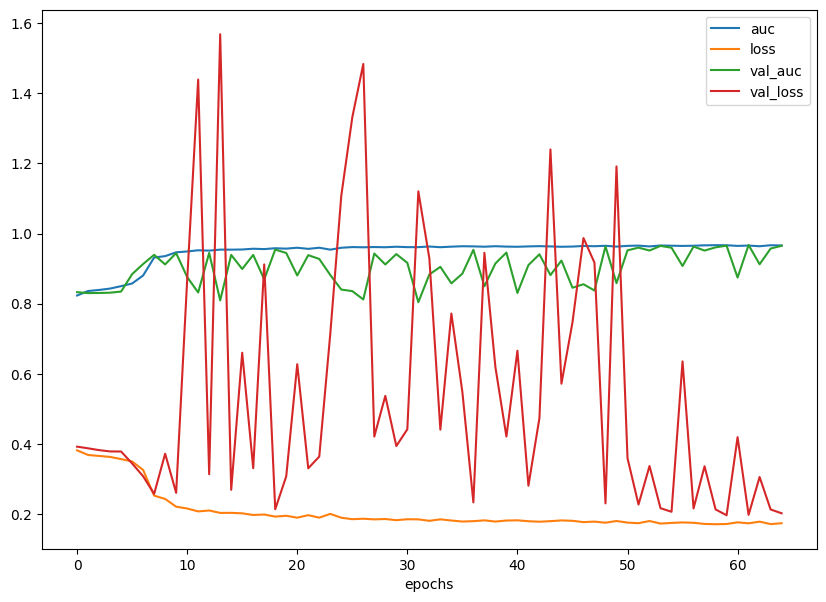

In [90]:
pd.DataFrame(history.history).plot(figsize=(10,7), xlabel="epochs")

(0.0, 1.0)

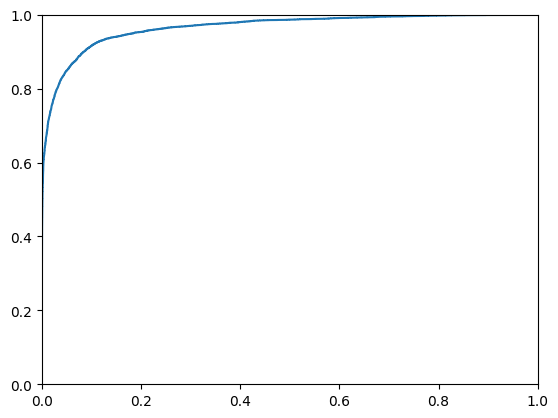

In [87]:
from sklearn.metrics import roc_curve
plt.plot(roc_curve(y_test, predict)[0], roc_curve(y_test, predict)[1])
plt.xlim(0, 1)
plt.ylim(0, 1)

In [88]:
pred_proba_final = model.predict(test_df[top_features]).reshape(-1)
csv_out_path = "Solution_files/Classification_AliAhmad_TensorFlowNN.csv"
pd.Series(pred_proba_final).to_csv(csv_out_path, sep=",", header=None)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 724us/step
